In [1]:
from IPython.core.display import display

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', size = 14)

In [2]:
from Sznajd1DModel import Sznajd1DModel, vote_result, individual_votes

import mesa.batchrunner as mb

# Single run

In [3]:
# each run has num_steps steps
max_steps = 300

# there is one agent at each node
# so we only need to know the size of the grid
width = 1000

In [26]:
# create a model
model = Sznajd1DModel(width)

# execute num_steps steps
for _ in range(max_steps):
    model.step()

<AxesSubplot:>

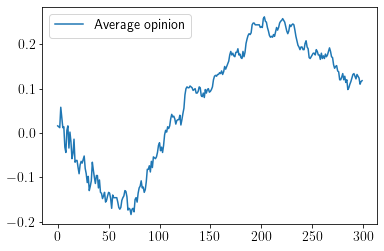

In [29]:
avg_vote_result = model.datacollector.get_model_vars_dataframe()
avg_vote_result.plot()

# Batch run

In [20]:
variable_params = { "width" : range(100,501,100)}
fixed_params = { }

batch_run = mb.BatchRunnerMP(
        Sznajd1DModel,
        nr_processes = 6,
        variable_parameters = variable_params,
        fixed_parameters = fixed_params,
        iterations=100,
        max_steps=50,
        model_reporters={"Average opinion": vote_result}
        )

In [21]:
batch_run.run_all()

500it [00:17, 28.63it/s]


({(100, 4): OrderedDict([('Average opinion', -0.46)]),
  (100, 3): OrderedDict([('Average opinion', 0.6)]),
  (100, 1): OrderedDict([('Average opinion', -0.28)]),
  (100, 5): OrderedDict([('Average opinion', 0.36)]),
  (100, 0): OrderedDict([('Average opinion', -0.42)]),
  (100, 2): OrderedDict([('Average opinion', 0.0)]),
  (100, 6): OrderedDict([('Average opinion', -1.0)]),
  (100, 8): OrderedDict([('Average opinion', -0.2)]),
  (100, 9): OrderedDict([('Average opinion', -0.26)]),
  (100, 10): OrderedDict([('Average opinion', -1.0)]),
  (100, 7): OrderedDict([('Average opinion', 0.9)]),
  (100, 11): OrderedDict([('Average opinion', -0.26)]),
  (100, 12): OrderedDict([('Average opinion', 0.4)]),
  (100, 14): OrderedDict([('Average opinion', 0.3)]),
  (100, 13): OrderedDict([('Average opinion', -0.06)]),
  (100, 15): OrderedDict([('Average opinion', -1.0)]),
  (100, 17): OrderedDict([('Average opinion', 0.16)]),
  (100, 16): OrderedDict([('Average opinion', -0.08)]),
  (100, 19): Order

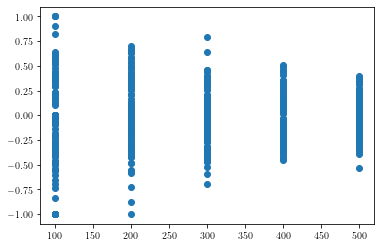

In [22]:
run_data = batch_run.get_model_vars_dataframe()
mpl.pyplot.scatter(run_data.width, run_data.aggregate('Average opinion'))